# Álgebre Lineal

Hacer ejercicios de:
- producto matriz vector
- suma de producto matriz matriz (@)
- Espacios vectoriales
- Indenpendencia y dep lineal
- Vectores ortogonales
- Rotaciones y reflexiones (Ver libro Meyer si no vienen en Grossman)
- Espacio nulo
- Espacio renglón
- Espacio columna
- Transformaciones lineales

---
# Interpolación
[Notas de interpoloación](https://github.com/ITAM-DS/Propedeutico/blob/master/Python/clases/3_algebra_lineal/2_interpolacion.ipynb)

Usamos interpolación para encontrar una función $f(x)$ dados puntos conocidos $x$ y $y$

Vamos a intentar resolver la práctica de interpolación
#####  Interpolar con 10 puntos generados de la función de Runge $f(x) = \frac{1}{1+25x^2}$ en el intervalo $[-1,1]$ equidistantes. Hacer la gráfica con $10,000$ puntos en el mismo intervalo. Utilizar polyfit para el polinomio interpolador y splines cúbicos.

### polyfit

In [114]:
import numpy as np
from pprint import pprint
import matplotlib.pyplot as plt

def f_runge(x):
    return 1/(1+(25*(x**2)))

In [115]:
a,b = [-1,1]

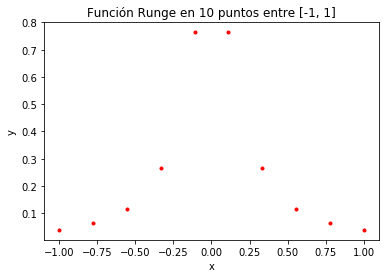

In [116]:
np.set_printoptions(precision = 2) #que se imprima mejor en la pantalla
n_points = 10

x = np.linspace(a,b,n_points)
y = f_runge(x)

plt.plot(x,y, 'r.')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Función Runge en 10 puntos entre [-1, 1]')
plt.show()

In [117]:
grade = n_points - 1
coeficientes = np.polyfit(x,y,9)

In [118]:
pprint(coeficientes)

array([ 3.96e-13,  2.16e+01, -7.20e-13, -4.49e+01,  3.86e-13,  3.07e+01,
       -5.84e-14, -8.26e+00, -8.80e-16,  8.62e-01])


Nuestro polinomio es
$$
p(x) = (3.96\times10^{-13})x^9 + (21.6)x^8 - (7.20\times10^{-13})x^7 - (44.9)x^6  + (3.86\times10^{-13})x^5 + (30.7)x^4 - (5.84\times10^{-14})x^3 - (8.26)x^2 - (8.8\times10^{-16})x + 0.862
$$

In [119]:
neval = 10000
xeval = np.linspace(min(x),max(x), neval)
yeval = np.polyval(coeficientes,xeval)

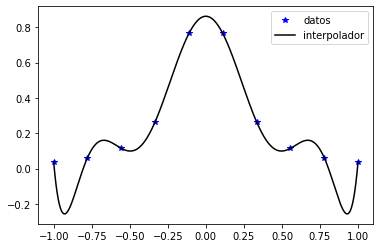

In [120]:
plt.plot(x, y, 'b*', xeval, yeval, 'k-')
plt.legend(['datos','interpolador'], loc='best')
plt.show()

***
### splines cúbicos

In [124]:

from scipy.interpolate import interp1d
pw_spline = interp1d(x, y, kind = 'cubic') #spline piecewise 
neval = 10000
xeval = np.linspace(min(x),max(x), neval)
yeval_cubic_splines = pw_spline(xeval)

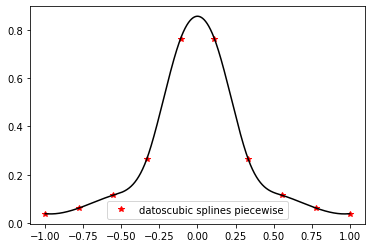

In [127]:
plt.plot(x, y, 'r*',xeval, yeval_cubic_splines, 'k-')
plt.legend(['datos''cubic splines piecewise'], loc='best')
plt.show()